In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from pyts.approximation import PiecewiseAggregateApproximation, SymbolicAggregateApproximation

In [2]:
s = np.loadtxt("Data\TiltABP_210_25000.txt")

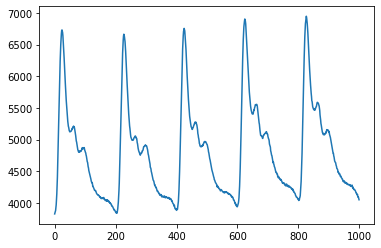

In [26]:
plt.plot(s[1000:2000])
plt.savefig("sig_bvp.svg")

In [22]:
# PAA transformation

paa2 = PiecewiseAggregateApproximation(window_size=2)
X_paa2 = paa2.transform([s[1000:2000]])
paa4 = PiecewiseAggregateApproximation(window_size=20)
X_paa4 = paa4.transform([s[1000:2000]])

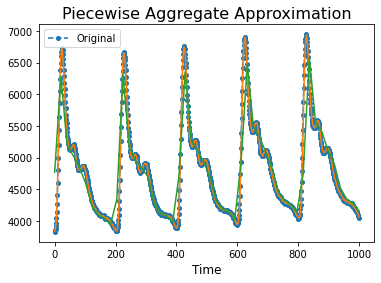

In [25]:
# Show the results for the first time series
n_timestamps = 1000
plt.figure(figsize=(6, 4))
plt.plot(s[1000:2000], 'o--', ms=4, label='Original')
x_paa2 = np.linspace(0, len(s[1000:2000]), len(X_paa2[0]))
plt.plot(x_paa2, X_paa2[0])
x_paa4 = np.linspace(0, len(s[1000:2000]), len(X_paa4[0]))
plt.plot(x_paa4, X_paa4[0])

plt.legend(loc='best', fontsize=10)
plt.xlabel('Time', fontsize=12)
plt.title('Piecewise Aggregate Approximation', fontsize=16)
plt.savefig("paa_test.svg")

## SAX

In [16]:
s = np.loadtxt("Data\DutchFactory_24_2184.txt")
s = s[1900:2000][::2]
sig = (s-np.mean(s))/np.std(s)

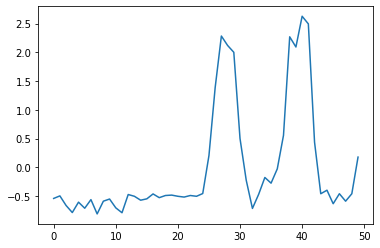

In [19]:
plt.plot(sig)

[-0.4307273  0.4307273]


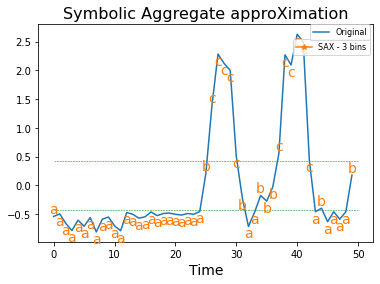

In [20]:
from scipy.stats import norm

# SAX transformation
X = [sig]
n_bins = 3
n_timestamps = 50
sax = SymbolicAggregateApproximation(n_bins=n_bins, strategy='normal')
X_sax = sax.fit_transform(X)

# Compute gaussian bins
bins = norm.ppf(np.linspace(0, 1, n_bins + 1)[1:-1])
print(bins)
# Show the results for the first time series
bottom_bool = np.r_[True, X_sax[0, 1:] > X_sax[0, :-1]]

plt.figure(figsize=(6, 4))
plt.plot(X[0], label='Original')
for x, y, s, bottom in zip(range(n_timestamps), X[0], X_sax[0], bottom_bool):
    va = 'bottom' if bottom else 'top'
    plt.text(x, y, s, ha='center', va=va, fontsize=14, color='#ff7f0e')
plt.hlines(bins, 0, n_timestamps, color='g', linestyles='--', linewidth=0.5)
sax_legend = mlines.Line2D([], [], color='#ff7f0e', marker='*',
                           label='SAX - {0} bins'.format(n_bins))
first_legend = plt.legend(handles=[sax_legend], fontsize=8, loc=(0.76, 0.86))
ax = plt.gca().add_artist(first_legend)
plt.legend(loc=(0.81, 0.93), fontsize=8)
plt.xlabel('Time', fontsize=14)
plt.title('Symbolic Aggregate approXimation', fontsize=16)
plt.savefig("sax_test.svg")

c:\users\joao0\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


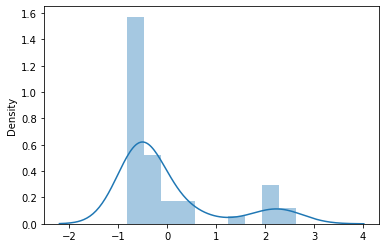

In [24]:
import seaborn as sns
sns.distplot(sig)
plt.savefig("density_sax.svg")

In [103]:
from dtw import dtw

In [163]:
s1 = np.loadtxt("Data\TiltECG_200_25000.txt")
s2 = np.loadtxt("Data\Fetal2013_70_6000_12000.txt")

In [164]:
s1 = s1[1100:1250]
s2 = s2[1140:1230]
s1 = (s1-min(s1))/(max(s1)-min(s1))
s2 = (s2-min(s2))/(max(s2)-min(s2))

from scipy import signal
s1 = signal.resample(s1, 80)
s2 = signal.resample(s2, 80)

In [165]:
euclidean_dist = lambda x, y: np.sqrt((x - y)**2)
d, cost_matrix, acc_cost_matrix, path = dtw(s1, s2, euclidean_dist)

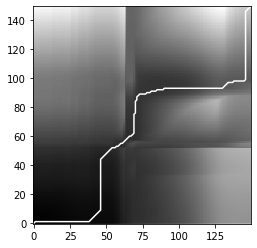

In [154]:
plt.imshow(acc_cost_matrix.T, origin='lower', cmap='gray', interpolation='nearest')
plt.plot(path[0], path[1], 'w')
plt.savefig("ecg_path_dtw.png")

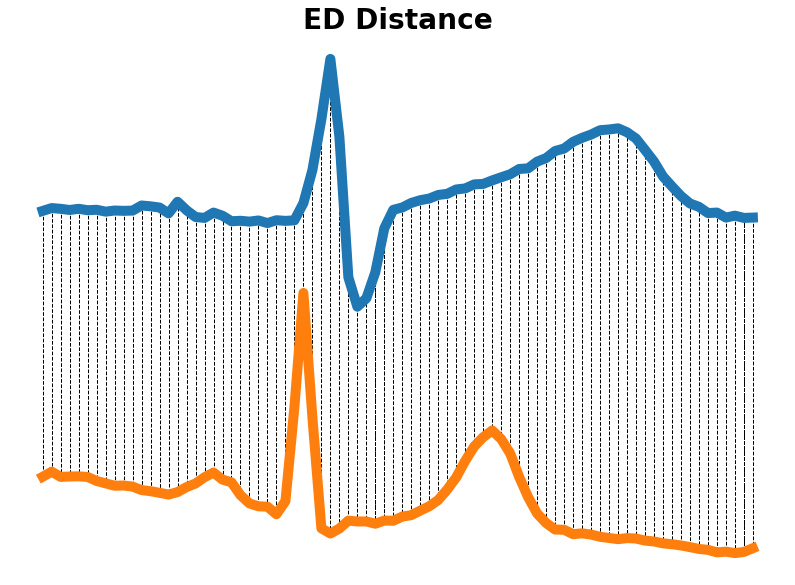

In [166]:
fig, ax = plt.subplots(figsize=(14, 10))

# Remove the border and axes ticks
fig.patch.set_visible(False)
ax.axis('off')

for [map_x, map_y] in zip(path[0], path[1]):
    ax.plot([map_x, map_x], [s1[map_x], s2[map_x]-1], '--k', linewidth=1)

ax.plot(s1, label='x', linewidth=10, markersize=2, markerfacecolor='lightcoral', markeredgecolor='lightcoral')
ax.plot(s2-1, label='y', linewidth=10, markersize=2, markerfacecolor='skyblue', markeredgecolor='skyblue')
ax.set_title("ED Distance", fontsize=28, fontweight="bold")

fig.savefig("ecg_ed_distance.svg")

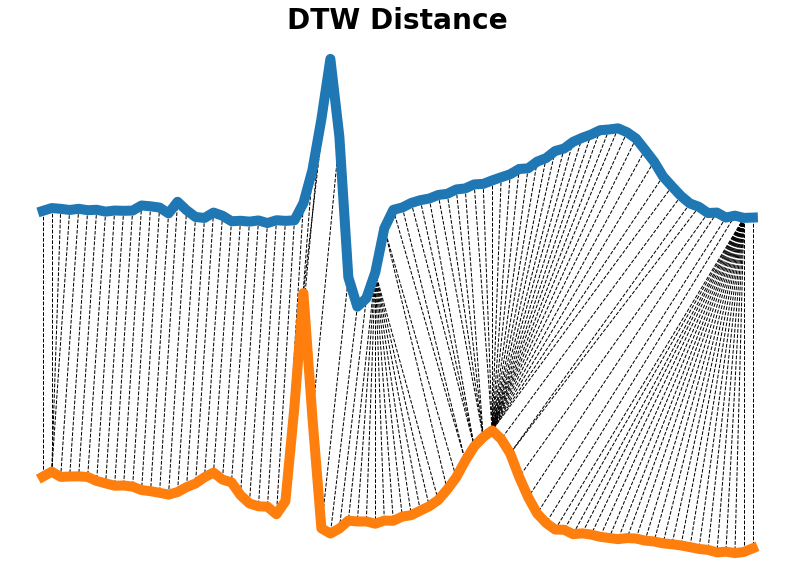

In [167]:
fig, ax = plt.subplots(figsize=(14, 10))

# Remove the border and axes ticks
fig.patch.set_visible(False)
ax.axis('off')

for [map_x, map_y] in zip(path[0], path[1]):
    ax.plot([map_x, map_y], [s1[map_x], s2[map_y]-1], '--k', linewidth=1)

ax.plot(s1, label='x', linewidth=10, markersize=2, markerfacecolor='lightcoral', markeredgecolor='lightcoral')
ax.plot(s2-1, label='y', linewidth=10, markersize=2, markerfacecolor='skyblue', markeredgecolor='skyblue')
ax.set_title("DTW Distance", fontsize=28, fontweight="bold")

fig.savefig("ecg_dtw_distance.svg")

In [158]:
print(d)

26.495207955352324


In [161]:
print(np.sum(euclidean_dist(s1, s2)))

41.75723364512956
